This notebook will detail how the number of consecutive trials required to see *N* of *N* target echoes twice varies across the number of echoes and number conspecific maskers present.


In [1]:
import copy
import os
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 100000
import numpy as np 
import pickle
from calc_num_IPIs import calc_num_IPIs_to_hear_echoes as nIPIs_to_mechoes
from calc_num_IPIs import calc_numtrials_per_echonumber 

In [2]:
%matplotlib notebook

In [3]:
main_folder = os.path.realpath('..')
results_folder = main_folder + os.path.join('\\analytical_modelling','results','the_CPN_nIPIs_to_hear_all_echoes\\')
pkl_files = ['N_IPIS_to_hear_allechoes_mytable_windows_1to17echoes_.pkl',
            'N_IPIS_to_hear_allechoes_mytable_ubuntu_17to31.pkl']

In [4]:
results_folder+pkl_files[0]

'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_nIPIs_to_hear_all_echoes\\N_IPIS_to_hear_allechoes_mytable_windows_1to17echoes_.pkl'

In [5]:
#### load the pkls
with open(results_folder+pkl_files[0], 'rb') as pkl:
    data_1to15 = pickle.load(pkl)

with open(results_folder+pkl_files[1], 'rb') as pkl2:
    data_17to31 = pickle.load(pkl2)



In [6]:
all_data = data_1to15 + data_17to31

In [12]:
allechoestwice_perechonum_percalldens = []
for each_echonum in all_data:
    num_echoes = each_echonum['num_targetechoes']
    allechoestwice_perechonum_percalldens.append(calc_numtrials_per_echonumber(each_echonum, min_echoes=num_echoes,
                                                                              numtimes_allechoes=2))


In [13]:
### get the 90 percentile of trials it took to hear all echoes twice :
numtrials_alldata_echoestwice = np.zeros((16,16))
for i, each_echonumber in  enumerate(allechoestwice_perechonum_percalldens):
    for j, calldensity in enumerate(each_echonumber.keys()):
        ninety_pctile = np.percentile(np.array(each_echonumber[calldensity]), 90)
        numtrials_alldata_echoestwice[i,j] = ninety_pctile    

np.save('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_all_echoes', numtrials_alldata)

numtrials_alldata = np.load('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_all_echoes.npy')

<IPython.core.display.Javascript object>


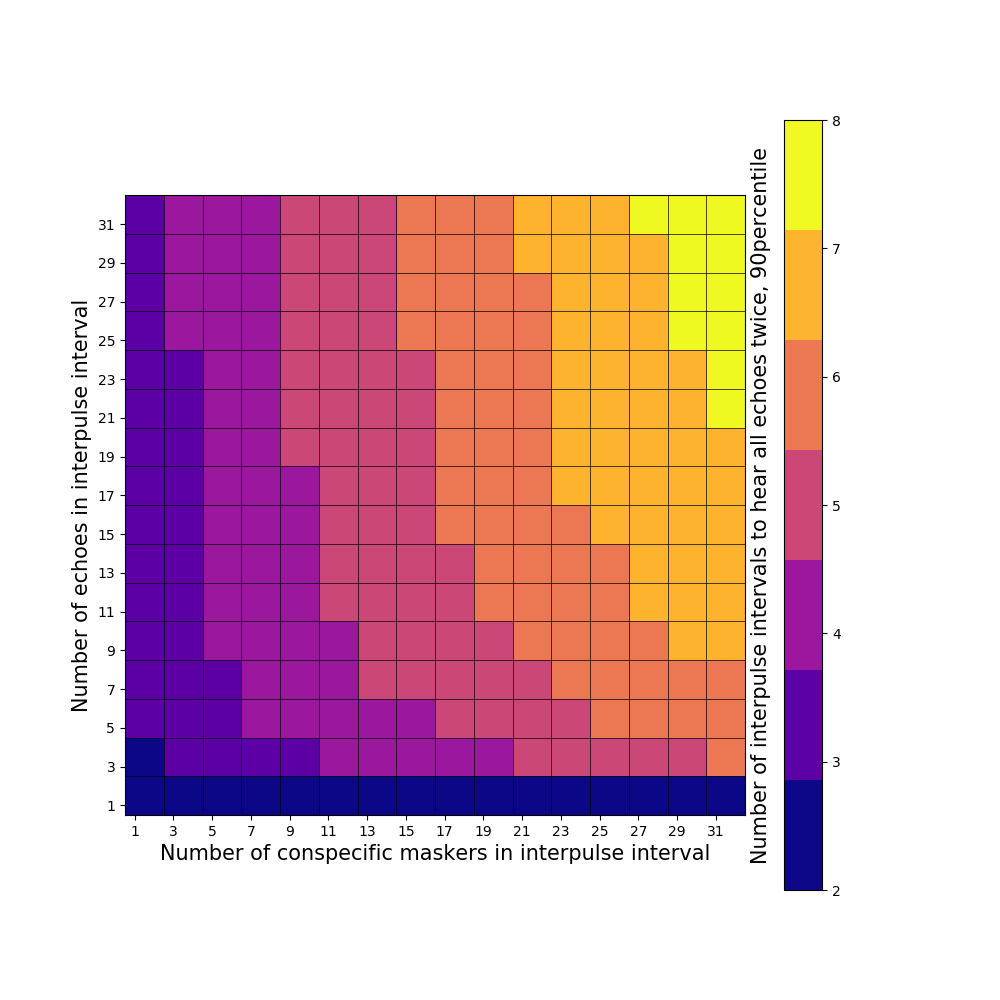

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(numtrials_alldata_echoestwice, aspect='equal', cmap=plt.cm.get_cmap('plasma', 7), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5], interpolation='none')

ticks = np.arange(1,33,2); plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)
lwd = 0.5
plt.vlines(ticks-0.5,0.5,32.5, linewidth=lwd)
plt.hlines(ticks-0.5,0.5,32.5, linewidth=lwd)

cbar = plt.colorbar();
cbar.set_label('Number of interpulse intervals to hear all echoes twice, 90percentile',
               rotation=90, labelpad=-65, fontsize=15)
plt.xlabel('Number of conspecific maskers in interpulse interval', fontsize=15);
plt.ylabel('Number of echoes in interpulse interval', fontsize=15)
plt.show()